In [1]:
import numpy as np
import emcee
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
import pandas as pd
import corner
import corner
import time 

In [2]:
'''
Weibull fitting template. 
'''
np.random.seed(0)

file_path = "../../csvs/Res_feats/"

#file_path = "/mnt/scratch-lustre/nhussain/data/distributions/LongScale/"
planet_systems = np.loadtxt(file_path+"order.txt", dtype = str)
#print planet_systems


# Then, define the probability distribution that you would like to sample.
def lnprob(p, vec):
    #vec is the data, p is the mcmc vector, in this case gamma, mu, alpha
    N = len(vec)
    gamma = p[0]
    mu = p[1]
    alpha = 0 #p[2]
    
     
    if gamma <=0: #gamma
        return -np.inf#0
    if alpha <= 0: # alpha
        return -np.inf
    if mu <= vec.min(): # mu must be greater than x
        return -np.inf
    
    try:

        probs = np.log(gamma/alpha) + (gamma-1)*np.log((vec - mu) / alpha) - gamma*((vec - mu)/alpha)
        #-0.5 * N * np.log(2. * np.pi) - N/2. * np.log(np.abs(p[1])**2) - 0.5 \
        #                            * np.sum(( (vec - p[0]) / p[1] ) ** 2)
        
    except:
        probs = - np.inf
       
    return probs


def lnprob2d(p, vec):
    #vec is the data, p is the mcmc vector, in this case gamma, mu, alpha
    N = len(vec)
    gamma = p[0]
    alpha = p[1]
    
     
    if gamma <=0: #gamma
        return -np.inf#0
    if alpha <= 0: # alpha
        return -np.inf
    
    try:

        probs =np.log(gamma) + (gamma -1)*np.log(vec) - vec**gamma
        
    except:
        probs = - np.inf
       
    return probs
                 
                          

print planet_systems.shape

(9,)


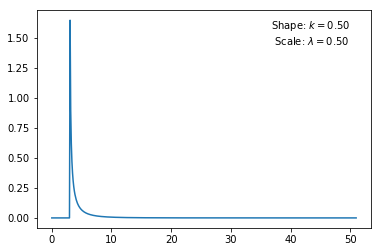

In [3]:
from scipy import stats

#input for pseudo data
N = 10000
gamma_in = 1.8 # 12
alpha_in = 10 # 6
a_in = 1
loc_in = 3 

#Generate data from given input
data = stats.weibull_min.rvs(c=gamma_in, loc=loc_in, scale=alpha_in, size = N)

#The a and loc are fixed in the fit since it is standard to assume they are known
gamma_out, loc_out, alpha_out = stats.weibull_min.fit(data )#, f0=a_in,floc=loc_in)

#Plot
bins = np.linspace(0,51,500)
fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1)
gamma_out = .5
alpha_out =.5
ax.plot(bins, stats.weibull_min.pdf(bins,c=gamma_out,loc=loc_out,scale = alpha_out))
#ax.hist(data, bins = bins , normed=True, alpha=0.5)
ax.annotate("Shape: $k = %.2f$ \n Scale: $\lambda = %.2f$"%(gamma_out,alpha_out), xy=(0.7, 0.85), xycoords=ax.transAxes)
plt.show()

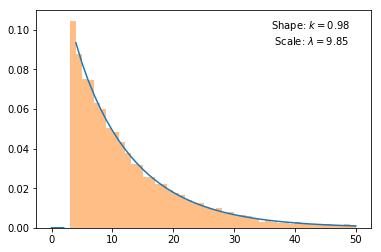

In [4]:
from scipy import stats
import matplotlib.pyplot as plt

#input for pseudo data
N = 10000
gamma_in = 1 # 12
alpha_in = 10 # 6
a_in = 1
loc_in = 3 

#Generate data from given input
data = stats.exponweib.rvs(a=a_in,c=gamma_in, loc=loc_in, scale=alpha_in, size = N)

#The a and loc are fixed in the fit since it is standard to assume they are known
a_out, gamma_out, loc_out, alpha_out = stats.exponweib.fit(data, f0=a_in,floc=loc_in)

#Plot
bins = range(51)
fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1)
ax.plot(bins, stats.exponweib.pdf(bins, a=a_out,c=gamma_out,loc=loc_out,scale = alpha_out))
ax.hist(data, bins = bins , normed=True, alpha=0.5)
ax.annotate("Shape: $k = %.2f$ \n Scale: $\lambda = %.2f$"%(gamma_out,alpha_out), xy=(0.7, 0.85), xycoords=ax.transAxes)
plt.show()

In [5]:
#try the fit on data without MCMC first
#id, gamma, loc, alpha
values = np.zeros((planet_systems.shape[0], 4))

for jj, planet_sys in enumerate(planet_systems[:]):
    print planet_sys
    np.random.seed(jj)
    data =pd.read_csv(file_path+"/"+planet_sys, index_col = 0)
    data = data[data["t"]<1e8]
    #print data.shape
    data = np.log10(data["t"].values)
    sys_name = planet_sys.split("_")[0]
    print sys_name, planet_sys
    bins = np.linspace(1,10,100)

    #The a and loc are fixed in the fit since it is standard to assume they are known
    #assume loc is the mean of the data?
    #let a be one for now ,
    start = time.time()
    gamma_out, loc_out, alpha_out = stats.weibull_min.fit(data )#, f0=a_in,floc=loc_in)
    print   stats.weibull_min.fit(data )#, f0=a_in,floc=loc_in)
    
    #print gamma_out.cov_params()
    
    end = time.time()
    print ("System", sys_name, ":", gamma_out, loc_out, alpha_out, "in", end - start)
    values[jj, :] = jj , gamma_out, loc_out, alpha_out
    '''
    fig = plt.figure(figsize=(8,4)) 
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(bins, stats.weibull_min.pdf(bins,c=gamma_out,loc=loc_out,scale = alpha_out))
    ax.hist(data, normed = 1)
    plt.show()
    '''
    #break


res1.bin_1000.csv
res1.bin res1.bin_1000.csv
(0.9522524849034317, 5.242694138973298, 0.05983805921213054)
('System', 'res1.bin', ':', 0.9522524849034317, 5.242694138973298, 0.05983805921213054, 'in', 0.26219797134399414)
res2.bin_1000.csv
res2.bin res2.bin_1000.csv
(3.6298050824348205, 4.181471354690883, 0.9459187916821743)
('System', 'res2.bin', ':', 3.6298050824348205, 4.181471354690883, 0.9459187916821743, 'in', 0.08680105209350586)
res3.bin_1000.csv
res3.bin res3.bin_1000.csv
(2.1264012845100515, 5.350923639668232, 1.1615280624146402)
('System', 'res3.bin', ':', 2.1264012845100515, 5.350923639668232, 1.1615280624146402, 'in', 0.07494401931762695)
res4.bin_1000.csv
res4.bin res4.bin_1000.csv
(3.5238199624704354, 4.204051972233424, 1.9588110937490306)
('System', 'res4.bin', ':', 3.5238199624704354, 4.204051972233424, 1.9588110937490306, 'in', 0.10050702095031738)
res5.bin_1000.csv
res5.bin res5.bin_1000.csv
(1.9587191495949383, 4.547163718171607, 0.7611340776463633)
('System', 'res5.

In [6]:
values
values_frame = pd.DataFrame(values, columns=["ID", "Gamma", "Location", "Alpha"])
#print values_frame.shape
#res then two planet systems
values_frame.to_csv("../../csvs/Res_feats/Weibull_Parameters_6.csv")

In [7]:
print values_frame.shape
values_frame.head(30)

(9, 4)


,ID,Gamma,Location,Alpha
0,0.0,0.952252,5.242694,0.059838
1,1.0,3.629805,4.181471,0.945919
2,2.0,2.126401,5.350924,1.161528
3,3.0,3.523820,4.204052,1.958811
4,4.0,1.958719,4.547164,0.761134
5,5.0,1.906946,4.337552,0.778403
6,6.0,2.496427,4.111580,2.228231
7,7.0,2.716537,3.952396,1.679034
8,8.0,1.244287,3.823293,0.829197


In [8]:
'''
MCMC fitting template. 
This template fits a 1-d gaussian, if you 
figure out how to use it for more complicated distributions
I'd appreciate if you let me know :)
banados@mpia.de
'''
np.random.seed(0)


# Then, define the probability distribution that you would like to sample.
def lnprob(p, vec):
    #diff = vec-p[0]
    N = len(vec)
    #probs = 
    gamma, mu, alpha = p

    if (gamma <=0) or (alpha <=0) or (mu <vec.min()):
        return -np.inf#0
    try:
        #probs =  -0.5 * N * np.log(2. * np.pi) - N * np.log(np.abs(p[1])) - 0.5 \
        #                            * np.sum(( (vec - p[0]) / p[1] ) ** 2)
        S
        #normalize it by the number of samples, similar to how it was done for the gaussian distribution
        #expression = (gamma/alpha) * ()
        #probs = np.log(gamma/alpha) + (gamma -1)/vec.shape[0]* np.nansum(np.log((vec-mu)/alpha)) - np.nansum(((vec-mu)/alpha)**gamma)/vec.shape[0]
        probs = np.log(gamma/alpha) + (gamma -1) * np.nansum(np.log((vec-mu)/alpha)) - gamma*np.nansum(((vec-mu)/alpha))
        #return probs
        #print "P SHAPE", type(probs)
    except:
        probs = -np.inf
    #print probs
    return probs
                       

print planet_systems.shape

(9,)


1007
Running MCMC ... Done at ... 28.3886599541 seconds.
Mean acceptance fraction: 0.0
[[ 0.05321731  0.00401447  0.00936599]
 [ 0.00401447  0.09234659 -0.01292504]
 [ 0.00936599 -0.01292504  0.07940909]]
0.000371008169897 0.548813503927 0.715189366372 0.602763376072


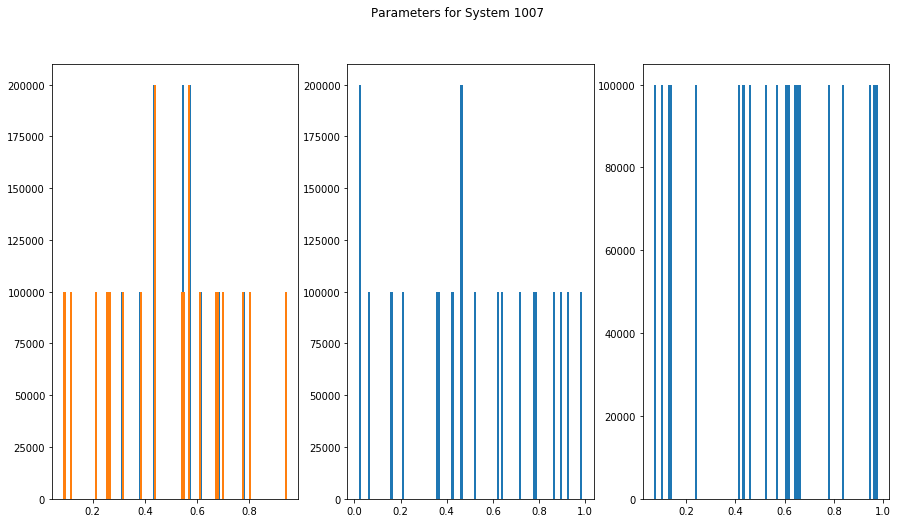

(2000000, 3)


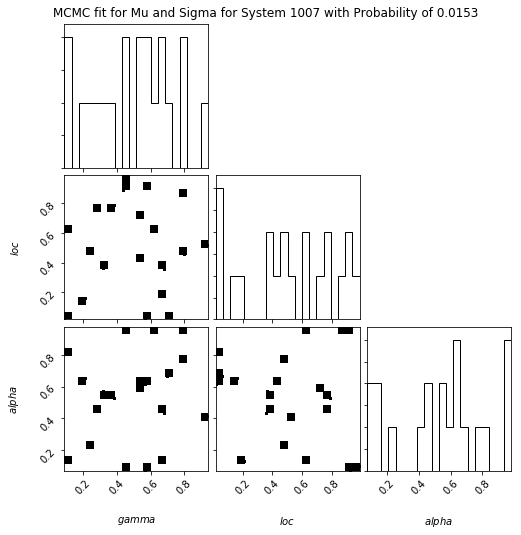

In [44]:
#file_path = "../../../mnt/stability_stuff/stabilitydataset/data/LongTimeScale/"
#planet_systems = np.loadtxt(file_path+"Order.txt", dtype = str)
#print planet_systems
#planet_sys = "Sys_24576_1e8.csv"

#data.head()

nwalkers = 20
ndim = 3
iterations = 100000

#store all the mean and  sigma in one large array, and then plot it all at the very end,
#since there are 48 systems, and 20*1000 samples per system, the final data array will be 960 000 long.
sample_size = nwalkers*iterations*planet_systems.shape[0]
all_walker_samples=np.zeros((int(sample_size), 4)) # add an extra clumn for the system index, and one for iteration number in for loop 
#mean_samples = np.zeros()

values = np.zeros((planet_systems.shape[0], 9), dtype=str)
covariences = np.zeros((planet_systems.shape[0], ndim, ndim))
info = pd.DataFrame(values, columns=["ID", "Probability", "Gamma", "Location", "Alpha", "Gamma_Error", "Location_Error", "Alpha_Error","Determinant"])
#info.head()



for jj, planet_sys in enumerate(planet_systems):

    np.random.seed(jj)
    data =pd.read_csv(file_path+planet_sys, index_col = 0)
    del data["Unnamed: 0.1"]
    del data["runstring"]
    data = data[data["t"]<1e8]
    #print data.shape
    data = np.log10(data["t"].values)
    sys_name = planet_sys.split("_")[1]
    print sys_name

    
   

    # Choose an initial set of positions for the walkers.
    p0 = [np.random.rand(ndim) for i in xrange(nwalkers)]
    #print p0
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[data], a=.1)
    
    # Run 200 steps as a burn-in.
    #print "Burning in ..."
    pos, prob, state = sampler.run_mcmc(p0, 1000)

    # Reset the chain to remove the burn-in samples.
    sampler.reset()
    
    print "Running MCMC ...",
    start = time.time()
    try:
        pos, prob, state = sampler.run_mcmc(pos, iterations, rstate0=jj)
    except Exception as e:
        print e
        print planet_sys
        continue
        
    end = time.time()
    print "Done at ...", (end - start), "seconds." 
    af = sampler.acceptance_fraction
    print "Mean acceptance fraction:", np.mean(af)
    

    #Determine the best mean and sigma
    maxprob_indice = np.argmax(prob)
    gamma_fit, loc_fit, alpha_fit = pos[maxprob_indice]
    #sigma_fit = np.abs(sigma_fit)
    #print "Estimated parameters: mean, sigma = %f, %f" % (mean_fit, sigma_fit)
    gamma_samples = sampler.flatchain[:,0]
    loc_samples = sampler.flatchain[:,1]
    alpha_samples = sampler.flatchain[:,2]
    gamma_std = gamma_samples.std()
    loc_std = loc_samples.std()

    alpha_std =np.std(np.abs(alpha_samples) )
    
    covarience = np.cov([gamma_samples, loc_samples, alpha_samples])
    print covarience
    determinant = np.linalg.det(covarience)
    print determinant, gamma_fit, loc_fit, alpha_fit
    covariences[jj, :, :] = covarience
    
    #'''
    ##PLOT SAMPLING SPACE
    fig = plt.figure(figsize=(15, 8))
    ax =fig.add_subplot("131")
    ax2 = fig.add_subplot("132")
    ax3 = fig.add_subplot("133")
    ax.hist(gamma_samples, 100)
    #ax.set_title("Samples for Mean - Optimal at " + str("{0:.4f}".format(mean_fit))+ " + "+ str("{0:.4f}".format(mean_std)))
    #ax2.set_title("Samples for Sigma - Optimal at " + str("{0:.4f}".format(sigma_fit))+ " + "+ str("{0:.4f}".format(sigma_std)))
    ax.hist(gamma_samples,  bins = np.linspace(np.min(np.abs(gamma_samples)), np.max(gamma_samples), 100))
    ax2.hist(loc_samples,  bins = np.linspace(np.min(np.abs(loc_samples)), np.max(loc_samples), 100))
    ax3.hist(alpha_samples,  bins = np.linspace(np.min(np.abs(alpha_samples)), np.max(alpha_samples), 100))

    fig.suptitle("Parameters for System "+sys_name)
    plt.show()
    #fig.savefig("../../MLstability/Figures/MCMCFigures/Parameters_"+sys_name, bbox_inches='tight')
    #plt.close(fig)
    #'''
    
    
    
    ##PLOT CORNER PLOT
    probability = np.log(gamma_fit/alpha_fit) + \
        (gamma_fit -1)/data.shape[0]* np.nansum(np.log((data-loc_fit)/alpha_fit)) - np.nansum(((data-loc_fit)/alpha_fit)**gamma_fit)/data.shape[0]
       
    #-np.log(2*np.pi)/2. - np.log(sigma_fit**2.)/2.-(1./(sigma_fit**2.)/2./info.shape[0])*np.nansum((data-mean_fit)**2.)
    samples = sampler.chain[:, :, :].reshape((-1, ndim))
    #'''
    print samples.shape
    fig = plt.figure(figsize=(12, 12))
    fig = corner.corner(samples, labels=["$gamma$", "$loc$", "$alpha$"],  figsize = (12, 12))
    fig.suptitle("MCMC fit for Mu and Sigma for System "+ sys_name + " with Probability of "+ str("{:.4f}".format(np.exp(probability))))
    #fig.savefig("../../MLstability/Figures/MCMCFigures/System_"+sys_name, bbox_inches='tight')
    #plt.close(fig)
    plt.show()
    #'''
       
    #'''
    #SAVE INFO OF INTEREST
    if np.exp(probability)>1:
        info.loc[jj] = [sys_name]+[np.inf]+[gamma_fit, loc_fit, alpha_fit] + [np.inf]*4

    else:
        info.loc[jj] = [sys_name, np.exp(probability), gamma_fit, loc_fit, alpha_fit, gamma_std, loc_std, alpha_std, determinant]
    #print sys_name , probability, np.exp(probability),"\n"
    #'''

    #save all the wallker values to be plotted later on
    #the thrid column in the system name
    #the fourth column is giving an index number, used for creating the custom color bar
    #all_walker_samples[(jj)*int(iterations*nwalkers):(jj+1)*int(iterations*nwalkers), :2] = samples[:,:]
    #all_walker_samples[(jj)*int(iterations*nwalkers):(jj+1)*int(iterations*nwalkers):,2] = sys_name
    #all_walker_samples[(jj)*int(iterations*nwalkers):(jj+1)*int(iterations*nwalkers):,3] = jj

    break

In [19]:
#info
info.to_csv("../../Figures/MCMCFigures/Weibull_MCMC_Params_145.csv")
info

,ID,Probability,Gamma,Location,Alpha,Gamma_Error,Location_Error,Alpha_Error,Determinant
0,1007,0.0152997,0.548814,0.715189,0.602763,0.230689,0.303886,0.281796,0.000371013
1,1021,3.73566e-38,0.417022,0.720324,0.000114375,0.264467,0.301296,0.319326,0.000530041
2,1025,0.0130017,0.435995,0.0259262,0.549662,0.271411,0.290108,0.22794,0.000312745
3,1041,0.00437459,0.550798,0.708148,0.290905,0.242771,0.224148,0.273904,0.00019012
4,10518,0.00303382,0.96703,0.547232,0.972684,0.274328,0.320001,0.252004,0.000468182
5,1052,0.014216,0.221993,0.870732,0.206719,0.314959,0.312532,0.277383,0.000591241
6,1107,0.00426638,0.89286,0.33198,0.821229,0.258036,0.248078,0.249252,0.000238405
7,1120,0.00657231,0.0763083,0.779919,0.438409,0.261139,0.272808,0.193199,0.000112842
8,1124,0.0376145,0.873429,0.968541,0.869195,0.286092,0.311353,0.276359,0.000501757
9,1128,0.000816578,0.0103742,0.501875,0.495773,0.304293,0.287476,0.284201,0.000567725


In [47]:
import numpy as np
from statsmodels.base.model import GenericLikelihoodModel

from scipy.stats import gamma, weibull_min, frechet_r
gamma = 2; loc = 0.71; alpha = 0.0166
data = weibull_min.rvs(gamma, loc=loc, scale=alpha, size=1000)
params = weibull_min.fit(data) # params close to but not the same as (shape, loc, scale) 
# HOW TO ESTIMATE/GET ERRORS FOR EACH PARAM?

print(params)
print('\n')


class Weibull(GenericLikelihoodModel):

    nparams = 3

    def loglike(self, params):
        return weibull_min.logpdf(self.endog, *params).sum()

start = time.time()
res = Weibull(data).fit(start_params=params, maxiter= 1000000)
end = time.time()
print "Time taken", end - start
res.df_model = len(params)
res.df_resid = len(data) - len(params)
print(res.summary())


(1.9184949094942234, 0.71019005221825171, 0.016284840052308777)


Optimization terminated successfully.
         Current function value: -3.493890
         Iterations: 53
         Function evaluations: 94
Time taken 0.713670015335
                               Weibull Results                                
Dep. Variable:                      y   Log-Likelihood:                 3493.9
Model:                        Weibull   AIC:                            -6980.
Method:            Maximum Likelihood   BIC:                            -6960.
Date:                Fri, 08 Sep 2017                                         
Time:                        11:18:14                                         
No. Observations:                1000                                         
Df Residuals:                     997                                         
Df Model:                           3                                         
                 coef    std err          z      P>|z|    

In [102]:
#try the fit on data without MCMC first
#id, gamma, loc, alpha
values = np.zeros((planet_systems.shape[0], 6))
covariences = np.zeros((planet_systems.shape[0], 3, 3))

for jj, planet_sys in enumerate(planet_systems[:]):

    np.random.seed(jj)
    data =pd.read_csv("../../../mnt/stability_stuff/stabilitydataset/data/LongTimeScale/"+planet_sys, index_col = 0)
    data = data[data["t"]<1e8]
    data = np.log10(data["t"].values)
    sys_name = planet_sys.split("_")[1]
    print sys_name
    start = time.time()
    gamma_out, loc_out, alpha_out = stats.weibull_min.fit(data )#, f0=a_in,floc=loc_in)
    print   stats.weibull_min.fit(data )#, f0=a_in,floc=loc_in)
    params = gamma_out, loc_out, alpha_out
    end = time.time()
    #print "System", sys_name, ":", gamma_out, loc_out, alpha_out, "in", end - start
    try:
        
        res = Weibull(data).fit(start_params=params, maxiter= 10000, method='basinhopping', tol = 0.0001 )
        res.df_model = len(params)
        res.df_resid = len(data) - len(params)
        #print res.summary()
        covariences[jj, :, :] = res.cov_params()
        determinant = np.linalg.det(covariences[jj, :, :])
        log_prob = res.llf
        gamma_out, loc_out, alpha_out = res.params.tolist()
        values[jj, :] = sys_name, gamma_out, loc_out, alpha_out, determinant, log_prob
    except Exception as e:
        print e
        #use values from scipy fit, add infi for det to show it did not work
        values[jj, :] = sys_name, gamma_out, loc_out, alpha_out, np.inf, np.inf

    print res.params
    #break


10518
(1.5966935984003858, 5.7811114976703646, 0.76195347733814778)
basinhopping step 0: f 0.48244
basinhopping step 1: f 0.48244 trial_f inf accepted 0  lowest_f 0.48244
basinhopping step 2: f 0.48244 trial_f inf accepted 0  lowest_f 0.48244
basinhopping step 3: f 0.48244 trial_f 0.48244 accepted 1  lowest_f 0.48244
found new global minimum on step 3 with function value 0.48244
basinhopping step 4: f 0.48244 trial_f inf accepted 0  lowest_f 0.48244
basinhopping step 5: f 0.48244 trial_f inf accepted 0  lowest_f 0.48244
basinhopping step 6: f 0.48244 trial_f inf accepted 0  lowest_f 0.48244
basinhopping step 7: f 0.48244 trial_f inf accepted 0  lowest_f 0.48244
basinhopping step 8: f 0.48244 trial_f 0.48244 accepted 1  lowest_f 0.48244
found new global minimum on step 8 with function value 0.48244
basinhopping step 9: f 0.48244 trial_f inf accepted 0  lowest_f 0.48244
basinhopping step 10: f 0.48244 trial_f inf accepted 0  lowest_f 0.48244
basinhopping step 11: f 0.48244 trial_f 0.4824

In [103]:
#values
values_frame = pd.DataFrame(values, columns=["ID", "Gamma", "Location", "Alpha", "Det", "log_Prob"])
#values_frame.to_csv("../Figures/MCMCFigures/Weibull_Parameters_Covariences.csv")

In [104]:
print len(np.unique(np.where(values_frame==np.nan)[0]))
values_frame

0


,ID,Gamma,Location,Alpha,Det,log_Prob
0,10518.0,1.596682,5.781118,0.761924,2.767189e-11,-479.063268
1,1174.0,3.376987,4.510927,0.831578,2.230435e-10,8.522532
2,12073.0,1.493763,3.786946,0.815897,3.416574e-12,-575.111277
3,12840.0,2.251994,3.382844,1.493508,2.557838e-10,-889.868297
4,13362.0,0.058621,1.874032,0.422755,inf,inf
5,15003.0,2.262614,5.773189,1.104849,2.366534e-10,-586.534047
6,15220.0,2.741699,4.871247,1.054836,2.520385e-10,-401.799913
7,16588.0,2.603843,5.507146,1.262937,7.478292e-10,-626.052856
8,17641.0,2.578515,4.505211,1.062594,2.682307e-10,-457.495476
9,18539.0,2.919782,5.426340,1.557530,5.728864e-09,-729.349880


In [85]:
#np.save('text.npy',mydata)
import pickle
#cPickle.dump(bst ,open("/scratch/nhussain/Trained_XGBModels/cPickle_No_Lya_Booster_Orb_"+name.split("=")[1].split(".")[0]+".pkl", 'wb'))

pickle.dump(covariences, open("../Figures/MCMCFigures/Weibull_Covariences.pkl", "wb"))

In [86]:
pickle.load(open("../Figures/MCMCFigures/Weibull_Covariences.pkl", "rb"))

array([[[  2.85892063e-03,  -3.01896477e-04,   6.14632512e-04],
        [ -3.01896477e-04,   7.40550502e-05,  -1.02403431e-04],
        [  6.14632512e-04,  -1.02403431e-04,   3.94809283e-04]],

       [[  1.87445243e-02,  -2.63234084e-03,   2.99356653e-03],
        [ -2.63234084e-03,   5.65935050e-04,  -5.98571352e-04],
        [  2.99356653e-03,  -5.98571352e-04,   7.00475164e-04]],

       [[  1.32750114e-03,  -3.30892367e-05,   2.50929754e-04],
        [ -3.30892367e-05,   9.45254868e-06,  -1.39837088e-05],
        [  2.50929754e-04,  -1.39837088e-05,   3.52646878e-04]],

       [[  3.54010539e-03,  -4.11027614e-04,   8.43931200e-04],
        [ -4.11027614e-04,   2.11985342e-04,  -2.43877872e-04],
        [  8.43931200e-04,  -2.43877872e-04,   7.70620060e-04]],

       [[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00]],

       [[  5.60818227e-03,  -8